# Import Data

importing all potentially necessary packages.

In [2]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib as plt
import matplotlib.pyplot as plt

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

importing data then handling values with '-' and making then NaN

In [3]:
# took care of the missing values by defining the dashes as NaNs below.

compdata_original = pd.read_csv('comp1data.csv', header=0, na_values = '-')

# show first 5 lines of data 

compdata_original.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


In [4]:
# Create a copy of the data

compdata = compdata_original.copy()

# Missing Values

In [5]:
# Create DF with only continuous features

compdata_cont = compdata.drop(['I1','I2','I3','C2'], axis=1)
compdata_cont.head()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,10.0,9.5,8.5,11.870000,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,8.0,10.0,8.0,7.250000,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,7.0,14.0,12.0,6.700000,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,11.5,16.0,14.0,12.390000,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,21.0,21.0,19.0,56.599998,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


In [6]:
# Create DF with only categorical features

compdata_cat = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3'], axis=1)
compdata_cat.head()

,I1,I2,I3,C2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,1.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,0.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,1.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,1.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,1.0


# Descriptive Statistics 
- .describe() will give us a good summary of the data we're working with.

In [7]:
compdata.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


In [8]:
compdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


In [9]:
compdata.isna().any()

I1         False
I2         False
I3          True
P(IPO)      True
P(H)        True
P(L)        True
P(1Day)     True
C1          True
C2          True
C3          True
C4          True
C5          True
C6          True
C7          True
T1          True
T2          True
T3          True
T4          True
T5          True
S1          True
S2          True
S3          True
dtype: bool

In [10]:
compdata.isna().sum()

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
dtype: int64

In [11]:
compdata.shape

(682, 22)

In [12]:
compdata.median()

P(IPO)     1.350000e+01
P(H)       1.500000e+01
P(L)       1.300000e+01
P(1Day)    1.484500e+01
C1         1.070000e+02
C2         1.000000e+00
C3         1.000000e-02
C4         9.124591e-03
C5         2.740018e+07
C6         7.398704e+06
C7         1.038330e+02
T1         4.440000e+02
T2         1.204500e+04
T3         1.078500e+04
T4         2.790000e+02
T5         6.240000e+02
S1         6.000000e+01
S2         1.000000e+02
S3         1.340000e+02
dtype: float64

# Imputation

## C2
- Since C2 is a binary value, we will fill the missing data with the mode
- doesn't look like this is working... see line 10

In [13]:


compdata_cat['Imputed_C2'] = compdata_cat['C2'].fillna(compdata_cat.C2.mode())
compdata_cat.head(50)

,I1,I2,I3,C2,Imputed_C2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,1.0,1.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,0.0,0.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,1.0,1.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,1.0,1.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,1.0,1.0
5,ACOM,Ancestry.com Inc.,7379,1.0,1.0
6,ACOR,ACORDA THERAPEUTICS INC,2836,1.0,1.0
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,0.0,0.0
8,ACTV,ACTIVE NETWORK INC,7372,1.0,1.0
9,ACW,ACCURIDE CORP,3714,1.0,1.0


## I3
- this is an industry classifier.  Since there are only 8 missing values, we can find this information online.

In [18]:
compdata_cat.loc[compdata_cat['I3'].isnull()]

,I1,I2,I3,C2,Imputed_C2
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",NaN,NaN,NaN
86,BLT,BLOUNT INTERNATIONAL INC,NaN,NaN,NaN
268,GSL,GLOBAL SIGNAL INC,NaN,NaN,NaN
330,KFI,KKR Financial Holdings LLC,NaN,NaN,NaN
400,NAUH,"National American University Holdings, Inc.",NaN,NaN,NaN
490,RCH,"CHINA CGAME, INC.",NaN,NaN,NaN
597,TRMM,"Access to Money, Inc.",NaN,NaN,NaN
614,TZOO,TRAVELZOO INC,NaN,NaN,NaN


- missing companies: ADKU, BLT, GSL, KFI, NAUH, RCH, TRMM, TZOO

# P(1Day)
- there are 22 missing values for this one.  Since the first day trading price is a factual value, it does not make sense to fill this in using imputation methods.  Only option is to drop the missing values.

(660, 18)

# Outliers:

In [15]:
# Determine if there are any outliers in the data that will alter the results
# Use box plots for all the variables to visualize the outliers 

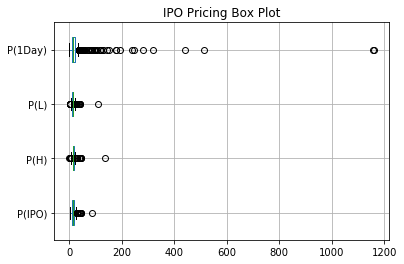

In [16]:
compdata.boxplot(column=['P(IPO)','P(H)','P(L)','P(1Day)'], vert=False)
plt.title('IPO Pricing Box Plot')
plt.show()

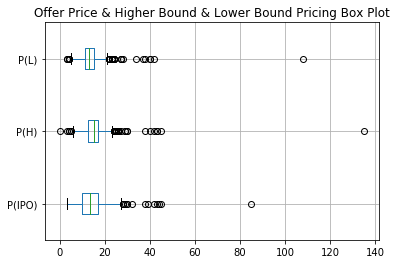

In [17]:
# Take P(1Day) out to create more even results

compdata.boxplot(column=['P(IPO)','P(H)','P(L)'], vert=False)
plt.title('Offer Price & Higher Bound & Lower Bound Pricing Box Plot')
plt.show()

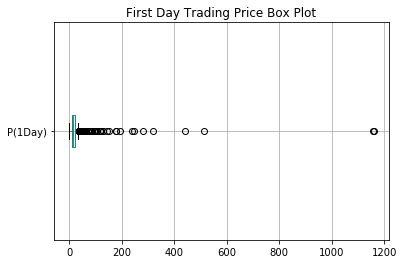

In [18]:
compdata.boxplot(column='P(1Day)', vert=False)
plt.title('First Day Trading Price Box Plot')
plt.show()

As we see above, the P(1Day) is positively skewed, so we should be looking to fill the missing values with:
- Square root
- Cube root
- log



ref: https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55

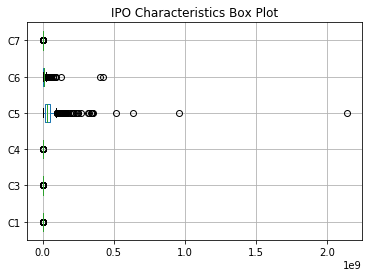

In [19]:
compdata.boxplot(column=['C1','C3','C4','C5','C6','C7'],vert=False)
plt.title('IPO Characteristics Box Plot')
plt.show()

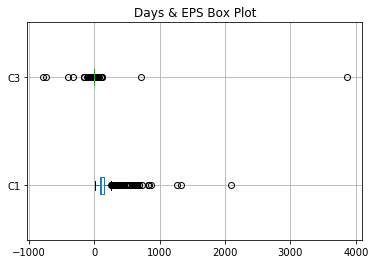

In [20]:
# Seperate the variables into that fit better with one another into their own box plot
    # Help visualization

compdata.boxplot(column=['C1','C3'],vert=False)
plt.title('Days & EPS Box Plot')
plt.show()

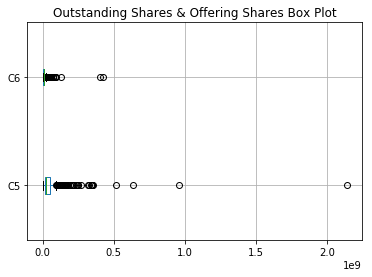

In [21]:
compdata.boxplot(column=['C5','C6'],vert=False)
plt.title('Outstanding Shares & Offering Shares Box Plot')
plt.show()

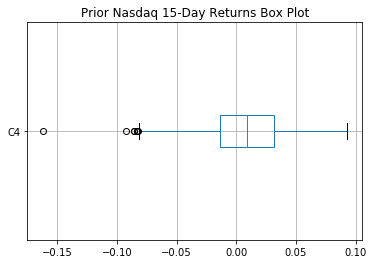

In [22]:
compdata.boxplot(column='C4',vert=False)
plt.title('Prior Nasdaq 15-Day Returns Box Plot')
plt.show()

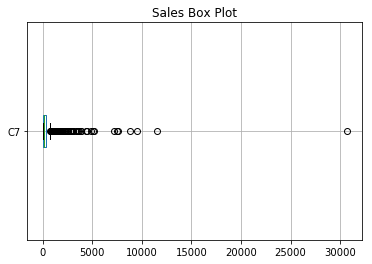

In [23]:
compdata.boxplot(column='C7',vert=False)
plt.title('Sales Box Plot')
plt.show()

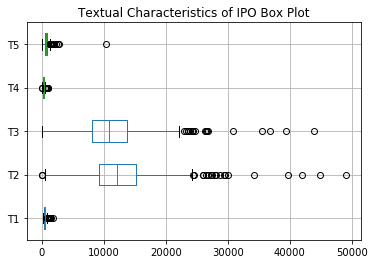

In [24]:
compdata.boxplot(column=['T1','T2','T3','T4','T5'],vert=False)
plt.title('Textual Characteristics of IPO Box Plot')
plt.show()

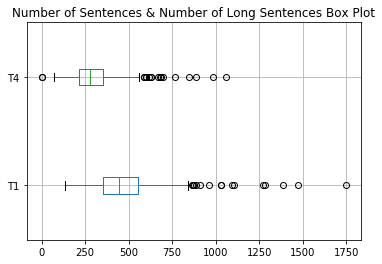

In [25]:
compdata.boxplot(column=['T1','T4'],vert=False)
plt.title('Number of Sentences & Number of Long Sentences Box Plot')
plt.show()

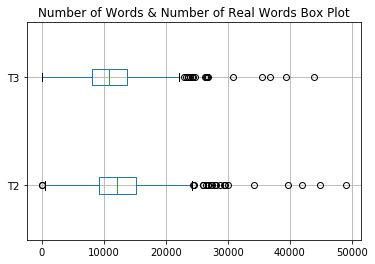

In [26]:
compdata.boxplot(column=['T2','T3'],vert=False)
plt.title('Number of Words & Number of Real Words Box Plot')
plt.show()

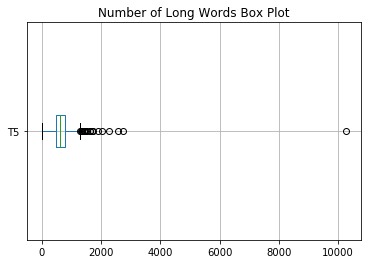

In [27]:
compdata.boxplot(column='T5',vert=False)
plt.title('Number of Long Words Box Plot')
plt.show()

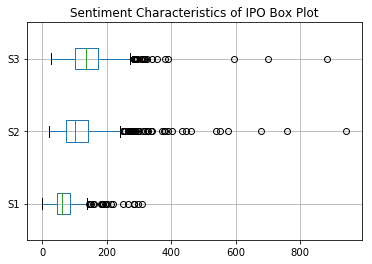

In [28]:
compdata.boxplot(column=['S1','S2','S3'],vert=False)
plt.title('Sentiment Characteristics of IPO Box Plot')
plt.show()

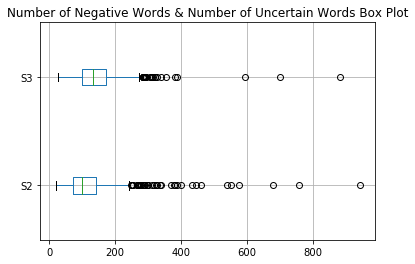

In [29]:
compdata.boxplot(column=['S2','S3'],vert=False)
plt.title('Number of Negative Words & Number of Uncertain Words Box Plot')
plt.show()

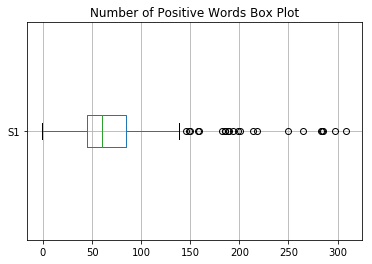

In [30]:
compdata.boxplot(column='S1',vert=False)
plt.title('Number of Positive Words Box Plot')
plt.show()

## Histograms 

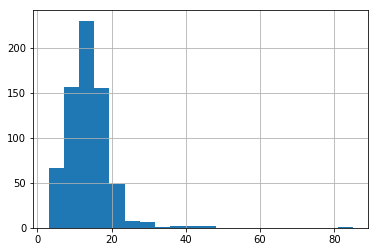

In [32]:
compdata['P(IPO)'].hist(bins=20)

# clear skew to the 

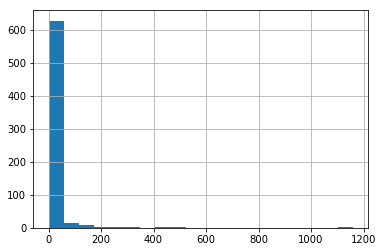

In [34]:
compdata['P(1Day)'].hist(bins=20)

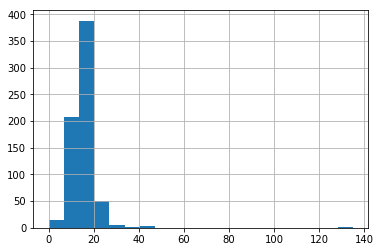

In [35]:
compdata['P(H)'].hist(bins=20)

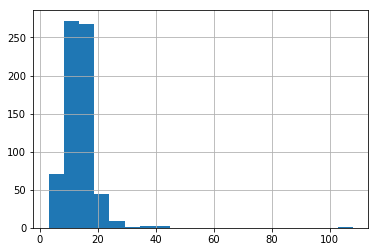

In [37]:
compdata['P(L)'].hist(bins=20)

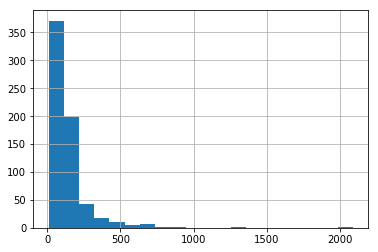

In [38]:
compdata['C1'].hist(bins=20)

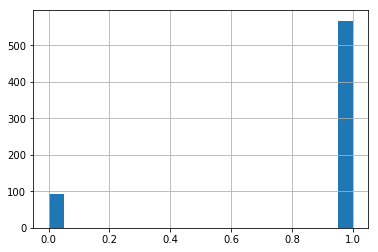

In [39]:
# a lot of missing values here so this is irrelevant right now

compdata['C2'].hist(bins=20)

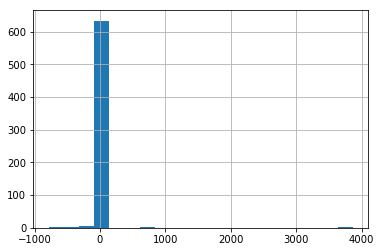

In [40]:
compdata['C3'].hist(bins=20)

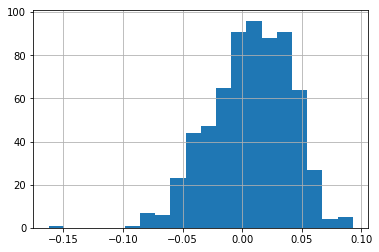

In [41]:
compdata['C4'].hist(bins=20)

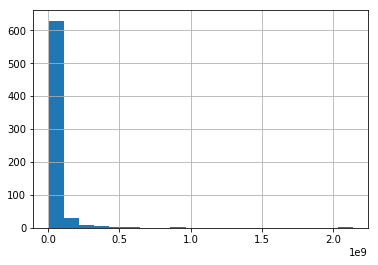

In [42]:
compdata['C5'].hist(bins=20)

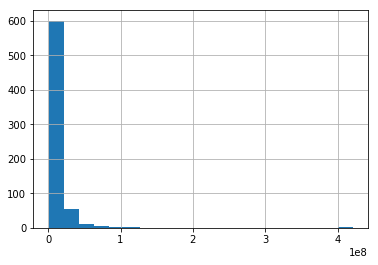

In [43]:
compdata['C6'].hist(bins=20)

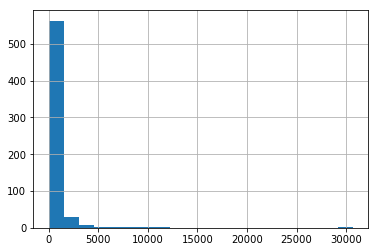

In [44]:
compdata['C7'].hist(bins=20)

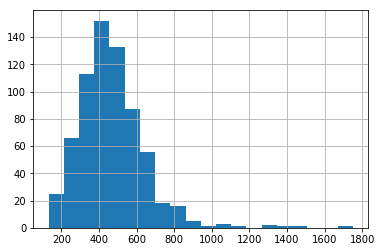

In [45]:
compdata['T1'].hist(bins=20)

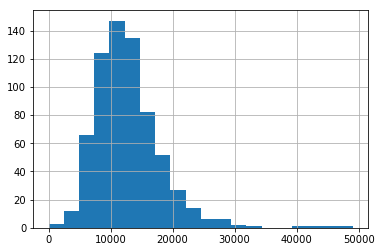

In [46]:
compdata['T2'].hist(bins=20)

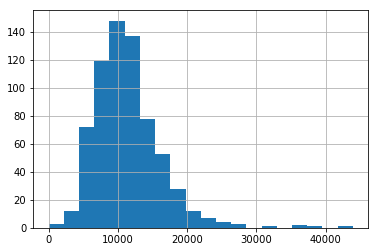

In [47]:
compdata['T3'].hist(bins=20)

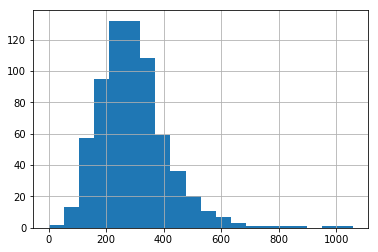

In [48]:
compdata['T4'].hist(bins=20)

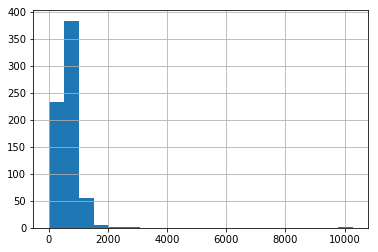

In [49]:
compdata['T5'].hist(bins=20)

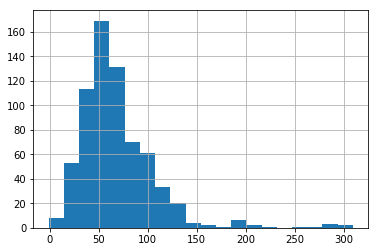

In [50]:
compdata['S1'].hist(bins=20)

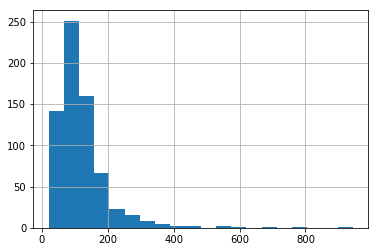

In [51]:
compdata['S2'].hist(bins=20)

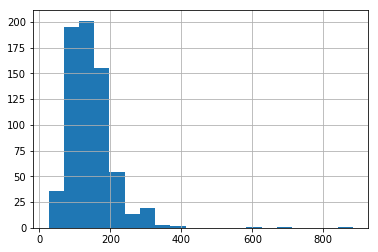

In [52]:
compdata['S3'].hist(bins=20)

In [53]:
# must revisit these histograms.  

KeyError: 'S4'

It is obvious that there are outliers in the dataset that will offset the results. 
To remove this data we will use the interquartile range to determine the upper and lower bound limits and any data outside the limit will be converted to either the lower or upper bound number.

In [23]:
Q1 = compdata['P(IPO)'].quantile(0.25)
Q3 = compdata['P(IPO)'].quantile(0.75)
IQR = Q3 - Q1
LowerBound = Q1 - (1.5 * IQR)
UpperBound = Q3 + (1.5 * IQR)

# compdata[((compdata['P(IPO)'] < LowerBound) |(compdata['P(IPO)'] > UpperBound))]

In [24]:
iqrdata = compdata_int.describe()
iqrdata

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


In [26]:
# This dataframe has rows for the IQR Upper Bound and Lower Bound numbers for each variable

iqrdata.loc['IQR'] = (iqrdata.loc['75%']-iqrdata.loc['25%'])
iqrdata.loc['UpperRange'] = (iqrdata.loc['75%']+(1.5*iqrdata.loc['IQR']))
iqrdata.loc['LowerRange'] = (iqrdata.loc['25%']-(1.5*iqrdata.loc['IQR']))
iqrdata

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000
IQR,7.000000,4.500000,4.000000,9.485000,70.250000,1.322500,0.045498,3.109368e+07,6.999999e+06,293.892250,200.000000,6046.000000,5598.000000,141.000000,333.000000,40.000000,69.000000,73.000000
UpperRange,27.500000,23.750000,21.000000,34.712499,260.625000,2.453750,0.099817,9.644838e+07,2.250000e+07,771.976375,851.000000,24310.000000,22157.000000,565.500000,1294.500000,145.000000,245.500000,282.500000


- We need to connect the upper bound and lower bound limits to all the variable results in the original dataframe
- Check to make sure the dataframe shows these changes in variables
- Create a new dataframe of the results excluding the outliers

# Meta Data:

- Do we need metadata?
- Will this help create the heatmap and correlations?

__**Not Finished__

data = []
for v in compdata.columns:
    # Defining the role
    if v == 'I1':
        role = 'ticker'
    elif v == 'I2':
        role = 'company_name'
    elif v == 'I3':
        role = 'standard_industry_classifier'
    else:
        role = 'input'
         
    # Defining the level
    if v == ('C2','Y1','Y2','C3'):
        level = 'binary'
    elif v == 'I2':
        role = 'company_name'
    elif v == 'I3':
        role = 'standard_industry_classifier'
    else:
        role = 'input'
    
    # Defining the data type 
    
    # Create a Dict that contains all the metadata for the variable

    
meta = pd.DataFrame(data, columns=[])
meta.set_index('varname', inplace=True)

# Variable Imputation:

- Should this be done before the IQR?

In [12]:
# Target Variable Calculation

compdata['P(mid)'] = ((compdata['P(H)']+compdata['P(L)'])/2)

def p(row):
    if row['P(IPO)'] < row['P(mid)']:
        val = 1
    else:
        val = 0
    return val

def q(row):
    if row['P(1Day)'] > row['P(IPO)']:
        val = 1
    else:
        val = 0
    return val

compdata['Y1'] = compdata.apply(p, axis=1)
compdata['Y2'] = compdata.apply(q, axis=1)

In [16]:
# Control Variable Calculation

def r(row):
    if row['C3'] >= 0:
        val = 1
    else:
        val = 0
    return val

def s(row):
    if row['P(IPO)'] > row['P(mid)']:
        val = (row['P(IPO)'] - row['P(mid)'])/row['P(mid)']*100
    else:
        val = 0
    return val

compdata['C3_'] = compdata.apply(r, axis=1)
compdata['C5_'] = compdata['C5']/compdata['C6'] 
compdata['C6_'] = compdata.apply(s, axis=1)

In [1]:
# Ratios:

    # ** How to fins the ratio for T1 and T2
    # ** Should the ratios be multiplied by 100?

# Percentage of real words
compdata['T3_'] = compdata['T3']/compdata['T2'] 
# Percentage of long sentences
compdata['T4_'] = compdata['T4']/compdata['T1'] 
# Percentage of long words
compdata['T5_'] = compdata['T5']/compdata['T2'] 
# Percentage of positive words
compdata['S1_'] = compdata['S1']/compdata['T2'] 
# Percentage of negative words
compdata['S2_'] = compdata['S2']/compdata['T2'] 
# Percentage of uncertain words
compdata['S3_'] = compdata['S3']/compdata['T2']

NameError: name 'compdata' is not defined

In [18]:
# Make sure all values were added
compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,Y2,C3_,C5_,C6_,T3_,T4_,T5_,S1_,S2_,S3_
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,1,1,3.864345,11.111111,0.908876,0.640426,0.054250,0.004875,0.009199,0.010929
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0,0,12.028832,0.000000,0.898724,0.644753,0.051395,0.003258,0.011105,0.010876
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,0,0,3.369134,0.000000,0.909350,0.636816,0.061764,0.011593,0.006271,0.011403
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,1,0,3.299697,0.000000,0.917060,0.539634,0.061630,0.009686,0.007144,0.013319
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,1,1,3.726269,5.000000,0.888469,0.587413,0.048550,0.004518,0.010047,0.011261


# Decision Trees

Approaches to distribute the missing value instances to child nodes:

- all goes to the node which already has the biggest number of instances (CART, is not the primary rule)
- distribute to all children, but with diminished weights, proportional with the number of instances from each child node (C45 and others)
- distribute randomly to only one single child node, eventually according with a categorical distribution (I have seen that in various implementations of C45 and CART for a faster running time)
- build, sort and use surrogates to distribute instances to a child node, where surrogates are input features which resembles best how the - test feature send data instances to left or right child node (CART, if that fails, the majority rule is used)

ref: https://stats.stackexchange.com/questions/96025/how-do-decision-tree-learning-algorithms-deal-with-missing-values-under-the-hoo

# Bayesian Solution
- we will look into how we can incorporate this into determining missing values.  
- need to look into this further - very complex.

In [ ]:
# Sample code taken from baseball that'll be helpful for binning later on.

#def assign_win_bins(W):
#    if W < 50:                    
#        return(1)
#    if W >= 50 and W <= 69:       
#        return(2)
#    if W >= 70 and W <= 89:       
#        return(3)
#    if W >= 90 and W <= 109:      
#        return(4)
#    if W >= 110:                  
#        return(5)